# 4.  Australia 'Data' Salary Title Analysis

In [1]:
# import necessary packages
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")


%config InlineBackend.figure_format = 'retina'
%matplotlib inline

style.use('ggplot')


C:\Users\tzechiang\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
# read in the data that has been scraped and cleaned
dummy = pd.read_csv('./datasets/dummy_stem.csv')

In [3]:
dummy.shape

(1396, 39)

In [4]:
dummy.head(2)

,Unnamed: 0,salary,title_cat,position_lvl,c_Administration & Office Support,"c_Advertising, Arts & Media",c_Banking & Financial Services,c_CEO & General Management,c_Call Centre & Customer Service,c_Community Services & Development,...,c_Sport & Recreation,c_Trades & Services,s_NSW,s_NT,s_QLD,s_SA,s_TAS,s_VIC,s_WA,stem
0,0,0,Data Analyst,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,the global transit depart is respons for the p...
1,1,0,Data Analyst,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,I m look to speak to mid to senior level data ...


In [5]:
# drop ['Unnamed: 0'] columns
dummy.drop(columns = ['Unnamed: 0'], inplace=True)

In [6]:
dummy.tail(2)

,salary,title_cat,position_lvl,c_Administration & Office Support,"c_Advertising, Arts & Media",c_Banking & Financial Services,c_CEO & General Management,c_Call Centre & Customer Service,c_Community Services & Development,c_Construction,...,c_Sport & Recreation,c_Trades & Services,s_NSW,s_NT,s_QLD,s_SA,s_TAS,s_VIC,s_WA,stem
1394,1,Data Scientist,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,your new compani financi firm in melbourn your...
1395,1,Data Scientist,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,about Us GE nyse GE drive the world forward by...


In [7]:
dummy.isnull().sum().sum()

1

In [8]:
dummy.dropna(inplace=True)

In [9]:
dummy.isnull().sum().sum()

0

Create and compare at least two models for each section. One of the two models should be a decision tree or ensemble model. The other can be a classifier or regression of your choosing (e.g. Ridge, logistic regression, KNN, SVM, etc).

Section 1: Job Salary Trends
Section 2: Job Category Factors

## Set tup the Target and Predictors

Target is what I want to predict using Predictors 

In [10]:
dummy.columns

Index(['salary', 'title_cat', 'position_lvl',
       'c_Administration & Office Support', 'c_Advertising, Arts & Media',
       'c_Banking & Financial Services', 'c_CEO & General Management',
       'c_Call Centre & Customer Service',
       'c_Community Services & Development', 'c_Construction',
       'c_Consulting & Strategy', 'c_Design & Architecture',
       'c_Education & Training', 'c_Engineering',
       'c_Farming, Animals & Conservation', 'c_Government & Defence',
       'c_Healthcare & Medical', 'c_Hospitality & Tourism',
       'c_Human Resources & Recruitment',
       'c_Information & Communication Technology', 'c_Legal',
       'c_Manufacturing, Transport & Logistics',
       'c_Marketing & Communications', 'c_Mining, Resources & Energy',
       'c_Real Estate & Property', 'c_Retail & Consumer Products', 'c_Sales',
       'c_Science & Technology', 'c_Sport & Recreation', 'c_Trades & Services',
       's_NSW', 's_NT', 's_QLD', 's_SA', 's_TAS', 's_VIC', 's_WA', 'stem'],
   

## Select Target and Predictors

In [11]:
# Target: Job Salary Trends
y = dummy['title_cat']

# Features/Predictor:
X = dummy.drop(columns=['title_cat'])
X.head(2)

,salary,position_lvl,c_Administration & Office Support,"c_Advertising, Arts & Media",c_Banking & Financial Services,c_CEO & General Management,c_Call Centre & Customer Service,c_Community Services & Development,c_Construction,c_Consulting & Strategy,...,c_Sport & Recreation,c_Trades & Services,s_NSW,s_NT,s_QLD,s_SA,s_TAS,s_VIC,s_WA,stem
0,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,the global transit depart is respons for the p...
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,I m look to speak to mid to senior level data ...


## Split to Train and test set

In [12]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

## Apply Natural Language Processing (NLP) and KBest Feature Selection

Now I have the data set with selected features words from the job title and summary 

Time to apply NLP modeling technique to see which model predit the best salary outcome

In [13]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

custom_stop_words = list(ENGLISH_STOP_WORDS)
# add own custom stopwords
word_list = ['thi', 'skill','click', 'job', 'role', 'cover', 'letter','resume', 'apply', 'button', 'abil'
             'quot', 'pleas', 'requir', 'phone', 'call', 'provid', 'includ', 'success', 'com', 'au', 'strong']
for w in word_list:
    custom_stop_words.append(w)


In [14]:
from wordcloud import WordCloud

def generate_word_cloud(words, freq=False):
    
    # if not frequency, the data is given as panda series
    # then need to do some data processing first
    if freq==False:

        stem_words = ' '

        for val in words:
            #val = str(val).lower()
            #line = re.sub(r"[^a-zA-Z\d\s.]+", " ", str(val))
            tokens = str(val).replace(".", " ").split()
            stemmed_tokens = [token.strip() for token in tokens] 
            stem_words = ' '.join(stemmed_tokens)

    #'--------------------------------------------------'
    # generate word could with some defined parameters
    wcloud = WordCloud(width = 480, height = 480,
                    background_color ='white', 
                    stopwords = custom_stop_words, 
                    min_font_size = 8)
    
    #'--------------------------------------------------'
    # now generate word clound based
    if freq:
        wcloud.generate_from_frequencies(words)
    else:
        wcloud.generate(stem_words) 
        
    #'--------------------------------------------------'
    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show()

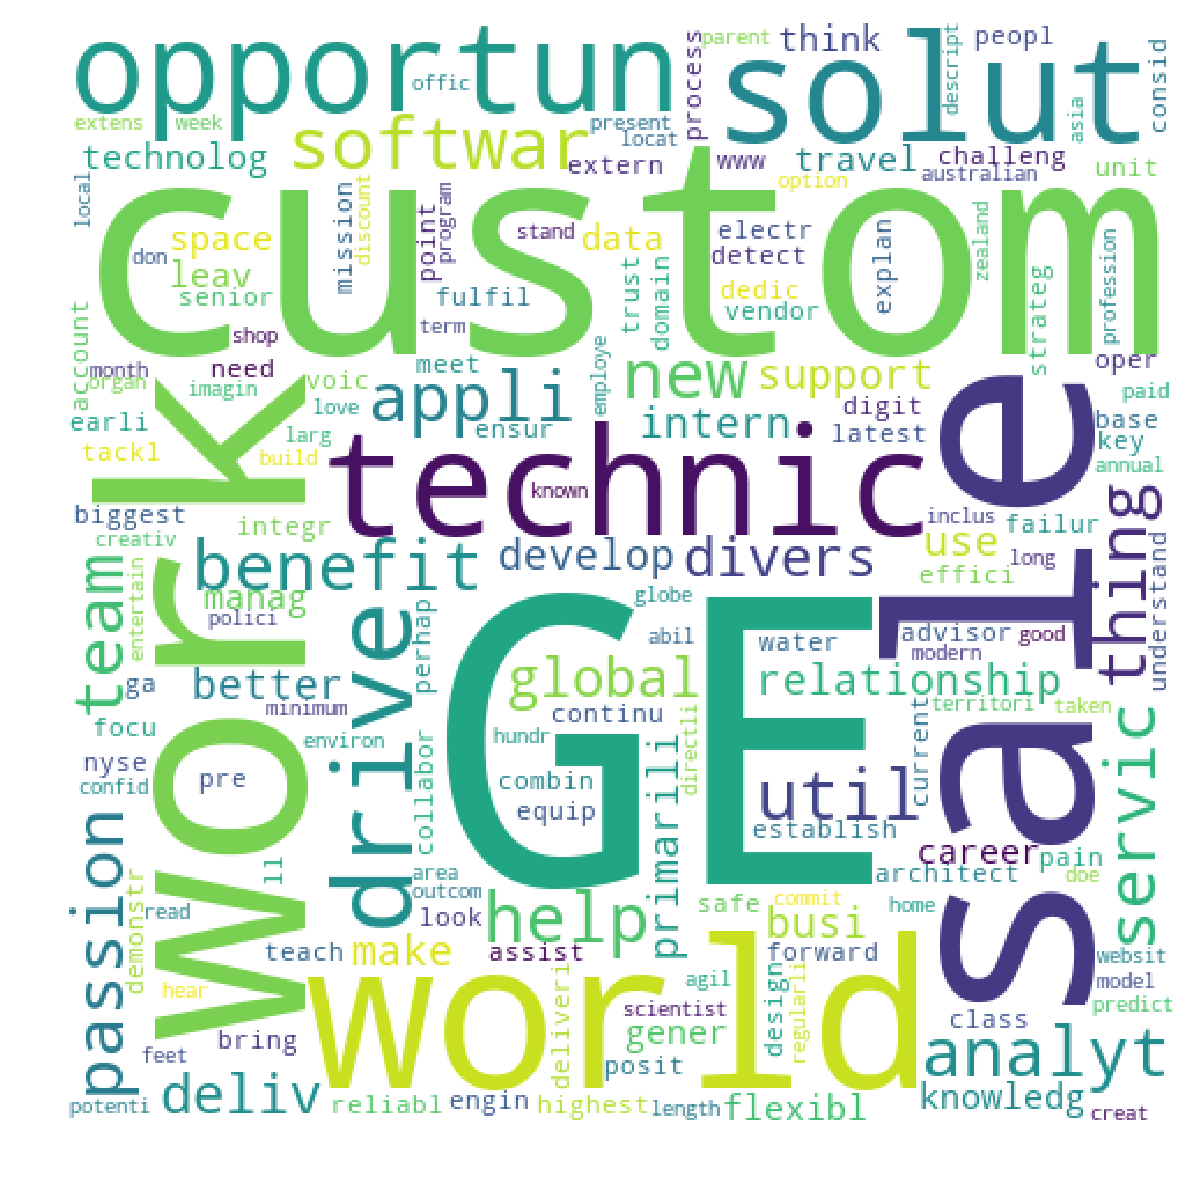

In [15]:
# generate word cloud - for the whole set
generate_word_cloud(X.stem)

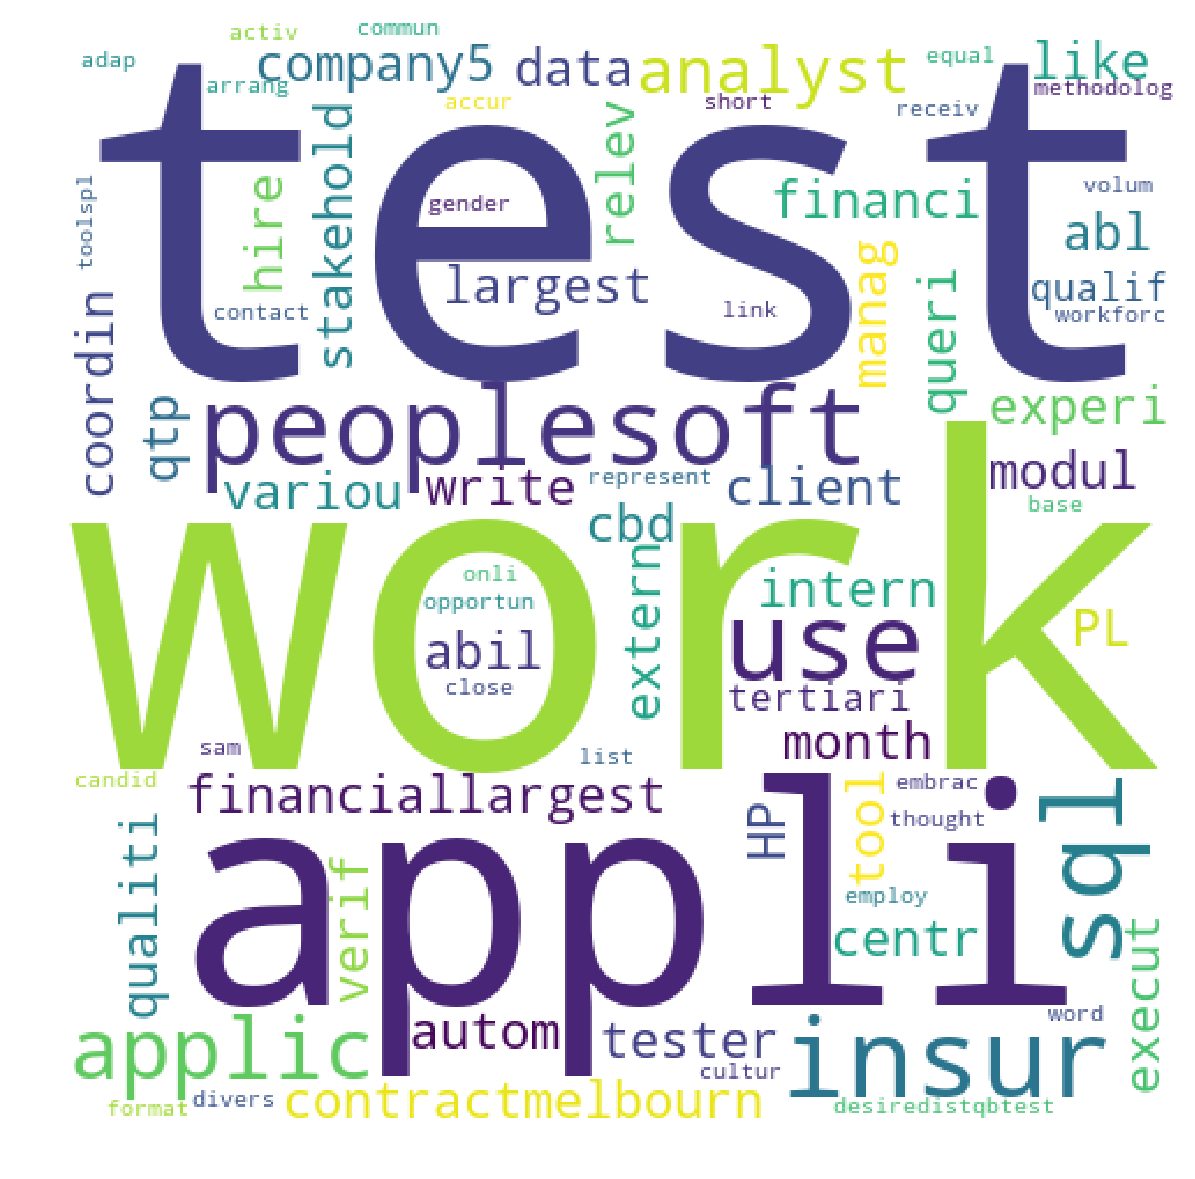

In [16]:
# generate word cloud - for the train set
generate_word_cloud(X_train.stem)

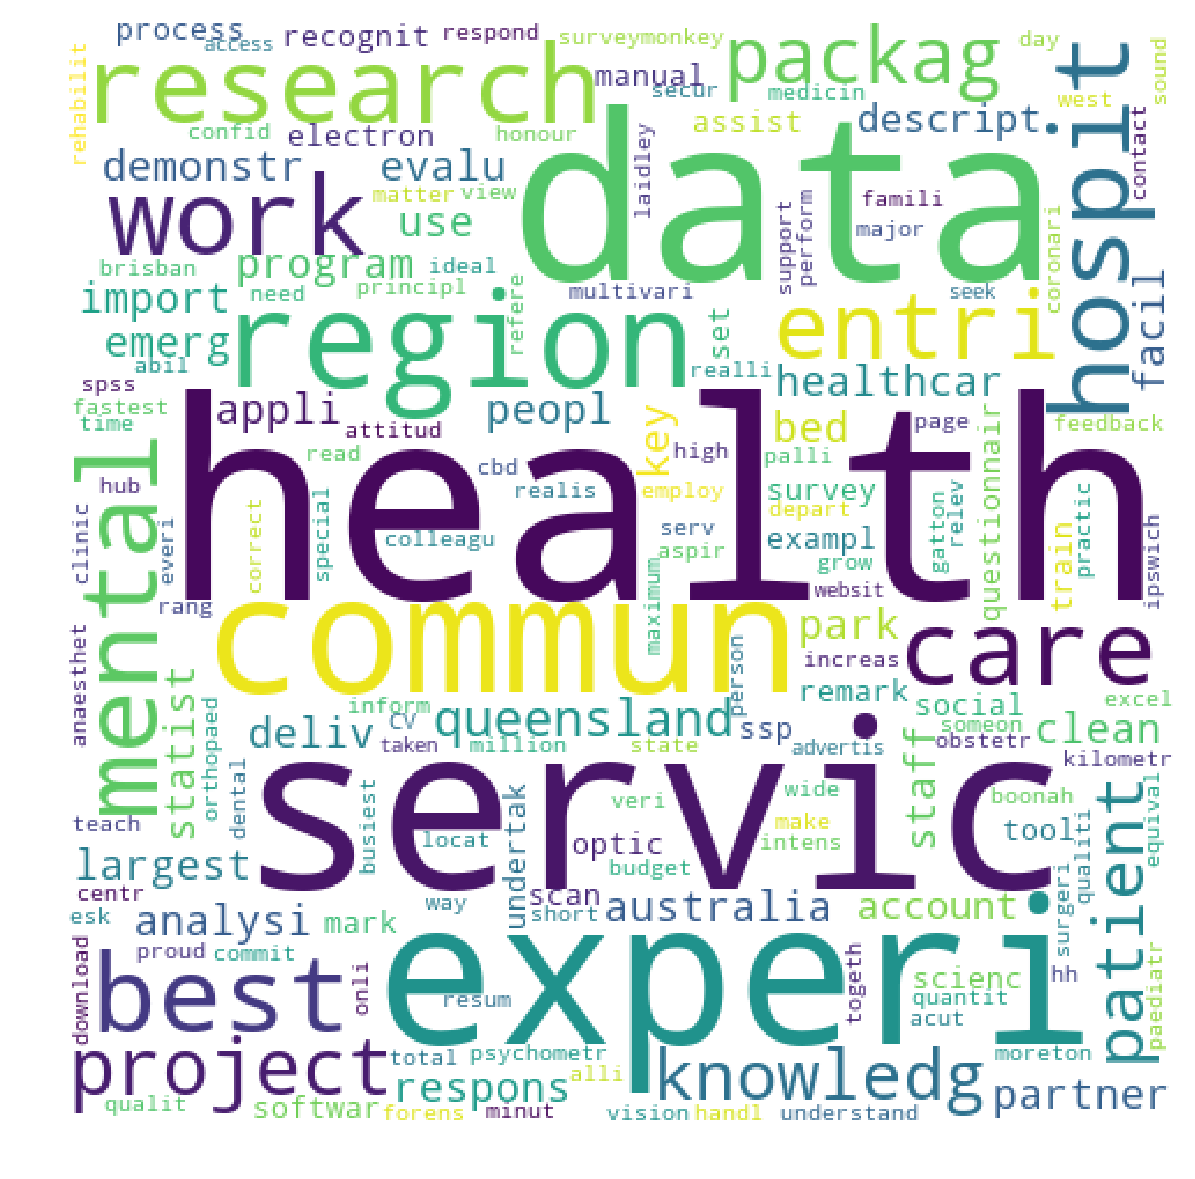

In [17]:
# generate word cloud - for the test set
generate_word_cloud(X_test.stem)

### Predict using Mltinomail Naive Bayes 

Predict using Mltinomail Naive Bayes with the new features from CountVectorizer.

In [18]:
# define a function that accepts a vectorizer and calculates the accuracy
def tokenize_test(vec):
    
    # Create document-term matrices - NLP
    #------------------------------------------------------------
    # Fitting and Transfrom the vectorizer on training data
    X_train_vec = vec.fit_transform(X_train['stem'])
    print('Features: ', X_train_vec.shape[1])

    # Transform on test data
    X_test_vec = vec.transform(X_test['stem'])
    #------------------------------------------------------------
    
    # Create dataframe after document-term matrices has been created
    #------------------------------------------------------------
    X_train_vec_df = pd.DataFrame(X_train_vec.todense(), columns=vec.get_feature_names())
    X_test_vec_df = pd.DataFrame(X_test_vec.todense(), columns=vec.get_feature_names())
    #------------------------------------------------------------
    
    # Extract top 10 and EDA
    #------------------------------------------------------------
    # top 10 words with highest frequency - work experience, management, data, team
    words = X_train_vec_df.sum().sort_values(ascending=False) #.head(20)
    #print(words)
    
    # plot top 10 words
    #words.plot(kind='bar', figsize=(15, 5))
    generate_word_cloud(words.to_dict(), True)
    #------------------------------------------------------------
    
    # Combine to create the full set of X
    #------------------------------------------------------------
    # remove stem columns as it now has been processed
    mask_train_df = X_train.drop('stem',axis=1).reset_index(drop=True)
    mask_test_df = X_test.drop('stem',axis=1).reset_index(drop=True)

    # time to put the data back to the main X_train and X_test
    X_train_dtm = pd.concat([mask_train_df, X_train_vec_df], axis=1)
    X_test_dtm = pd.concat([mask_test_df, X_test_vec_df], axis=1)
    #------------------------------------------------------------
    
    
    # Kbest Feature Selection after NLP
    #----------------------------------------------------------
    # build the selector (build one with each score type)
    skb_f = SelectKBest(f_classif) # default is k=10)

    # train the selector on data
    skb_f.fit(X_train_dtm, y_train)

    # examine results
    kbest = pd.DataFrame({'variable': X_train_dtm.columns.values.tolist(),
                         'score': list(skb_f.scores_)}).sort_values('score', ascending = False)
    
    kbest.columns = ['kBest_features', 'kBest_score']    
    kbest.reset_index(inplace=True, drop=True)

    # plot top 10 features
    kbest.head(20).plot(kind='bar', x='kBest_features', y='kBest_score', figsize=(15,5), grid=True)
    
    X_Ktrain = X_train_dtm[kbest.kBest_features]
    X_Ktest = X_test_dtm[kbest.kBest_features]

    return (X_Ktrain, X_Ktest)

In [19]:
def roc_confusion(y_test, y_pred, model_name):
    
    print(classification_report(y_test, y_pred))
    
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm,annot=True,fmt="d")
    
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    
    # Plot of a ROC curve
    print ('Plotting ROC curve for ', model_name)
    plt.figure(figsize=[8,8])
    
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=4)
    plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
    plt.xlim([-0.05, 1.0])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate', fontsize=18)
    plt.ylabel('True Positive Rate', fontsize=18)
    plt.title('Salary Classification', fontsize=18)
    plt.legend(loc="lower right")
    plt.show()
    
    return None;

In [20]:
def apply_model(model, model_name, X_train_data, X_test_data):
    
#     print ('-----------------------------------')
#     print (model_name)
#     print ('-----------------------------------')
    model.fit(X_train_data, y_train)

    y_pred = model.predict(X_test_data)
    
    print(classification_report(y_test, y_pred))
    #roc_confusion(y_test, y_pred, model_name)
    
    # confusion matrix - heat map plot
    #cm = confusion_matrix(y_test, y_pred)
    #sns.heatmap(cm,annot=True,fmt="d")
    
    # calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    #print('Accuracy score for best params: %.3f ' % accuracy)
    
    model_scores = cross_val_score(model, X_train_data, y_train, cv=5)
    train_score = model.score(X_train_data, y_train) 
    test_score = model.score(X_test_data, y_test)
#     print('Train score: %.3f ' % train_score)
#     print('Test score: %.3f ' % test_score)
    
    
    accuracy_crossval = np.mean(model_scores)
#     print('Train Mean CV R2: %.3f ' % accuracy_crossval)
    
    return [train_score, test_score, accuracy_crossval, accuracy]


In [21]:
### Setting the countvectorizer with different parameters to see the differences

In [22]:
mnb = MultinomialNB()
bnb = BernoulliNB()
logistic_l1 = LogisticRegression(penalty='l1')
logistic_l2 = LogisticRegression(penalty='l2')
rfr=RandomForestClassifier(max_depth=50,n_estimators=100, n_jobs=-1)
#knn = KNeighborsClassifier()

# logistic_l1 = LogisticRegression(C=10, solver='liblinear', penalty='l1', verbose=1)
# logistic_l2 = LogisticRegression(C=10, solver='liblinear', penalty='l2', verbose=1)

models = { mnb: 'Multinomail Naive Bayes',
          bnb: 'BernoulliNB Naive Bayes',
          logistic_l1: 'Logistic Regression L1',
          logistic_l2: 'Logistic Regression L2',
          rfr: 'Random Forest'}

colNames = ['Train', 'Test','Accuracy Crossval', 'Accuracy Score']

Features:  1000


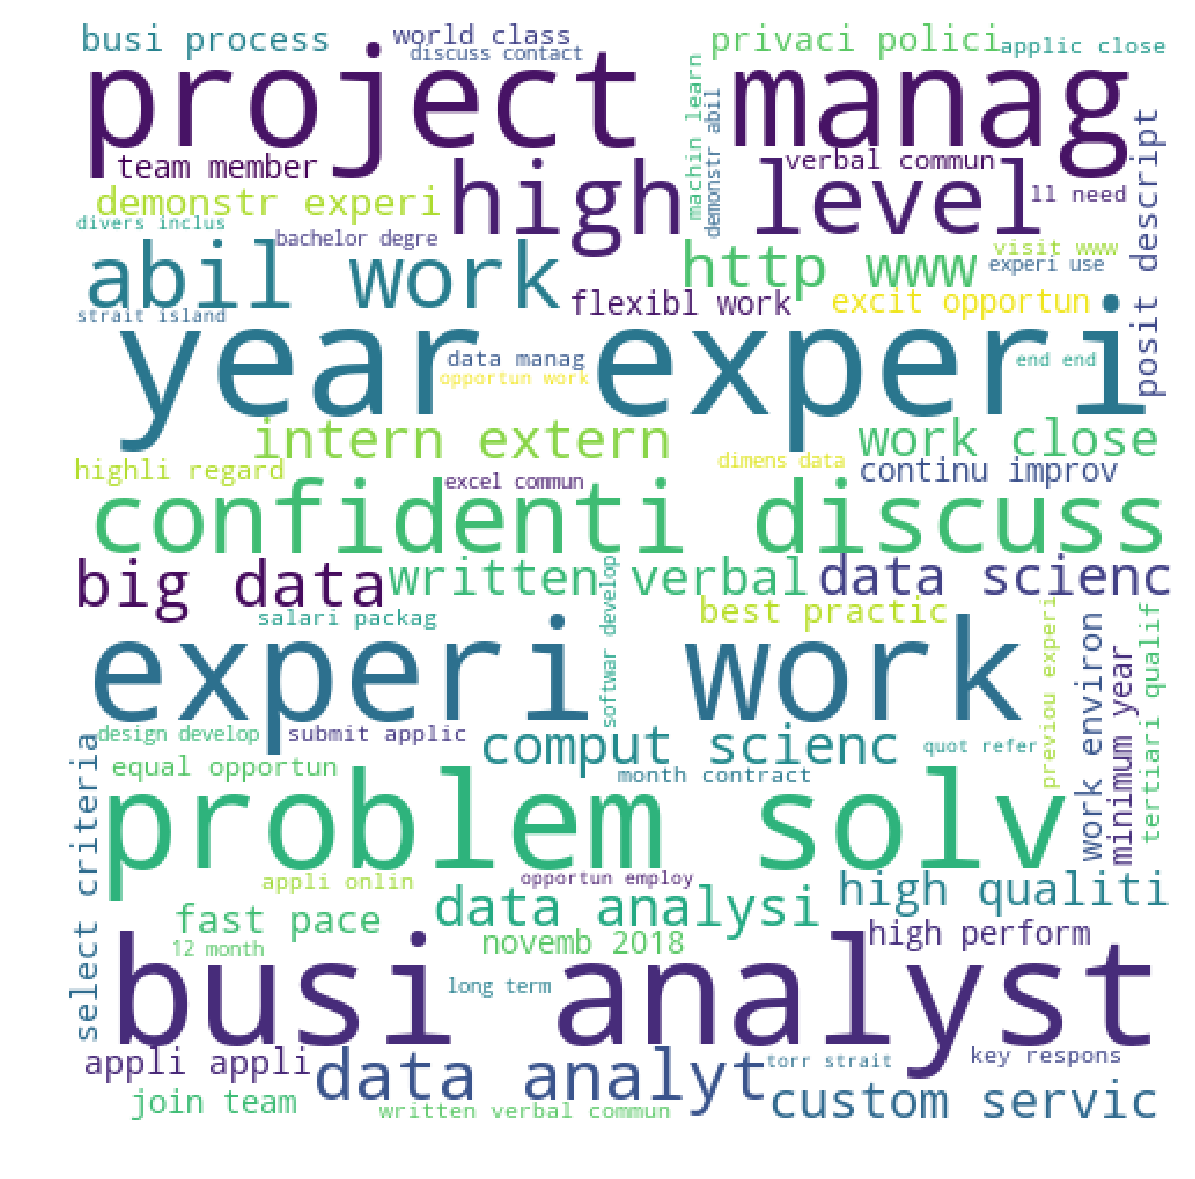

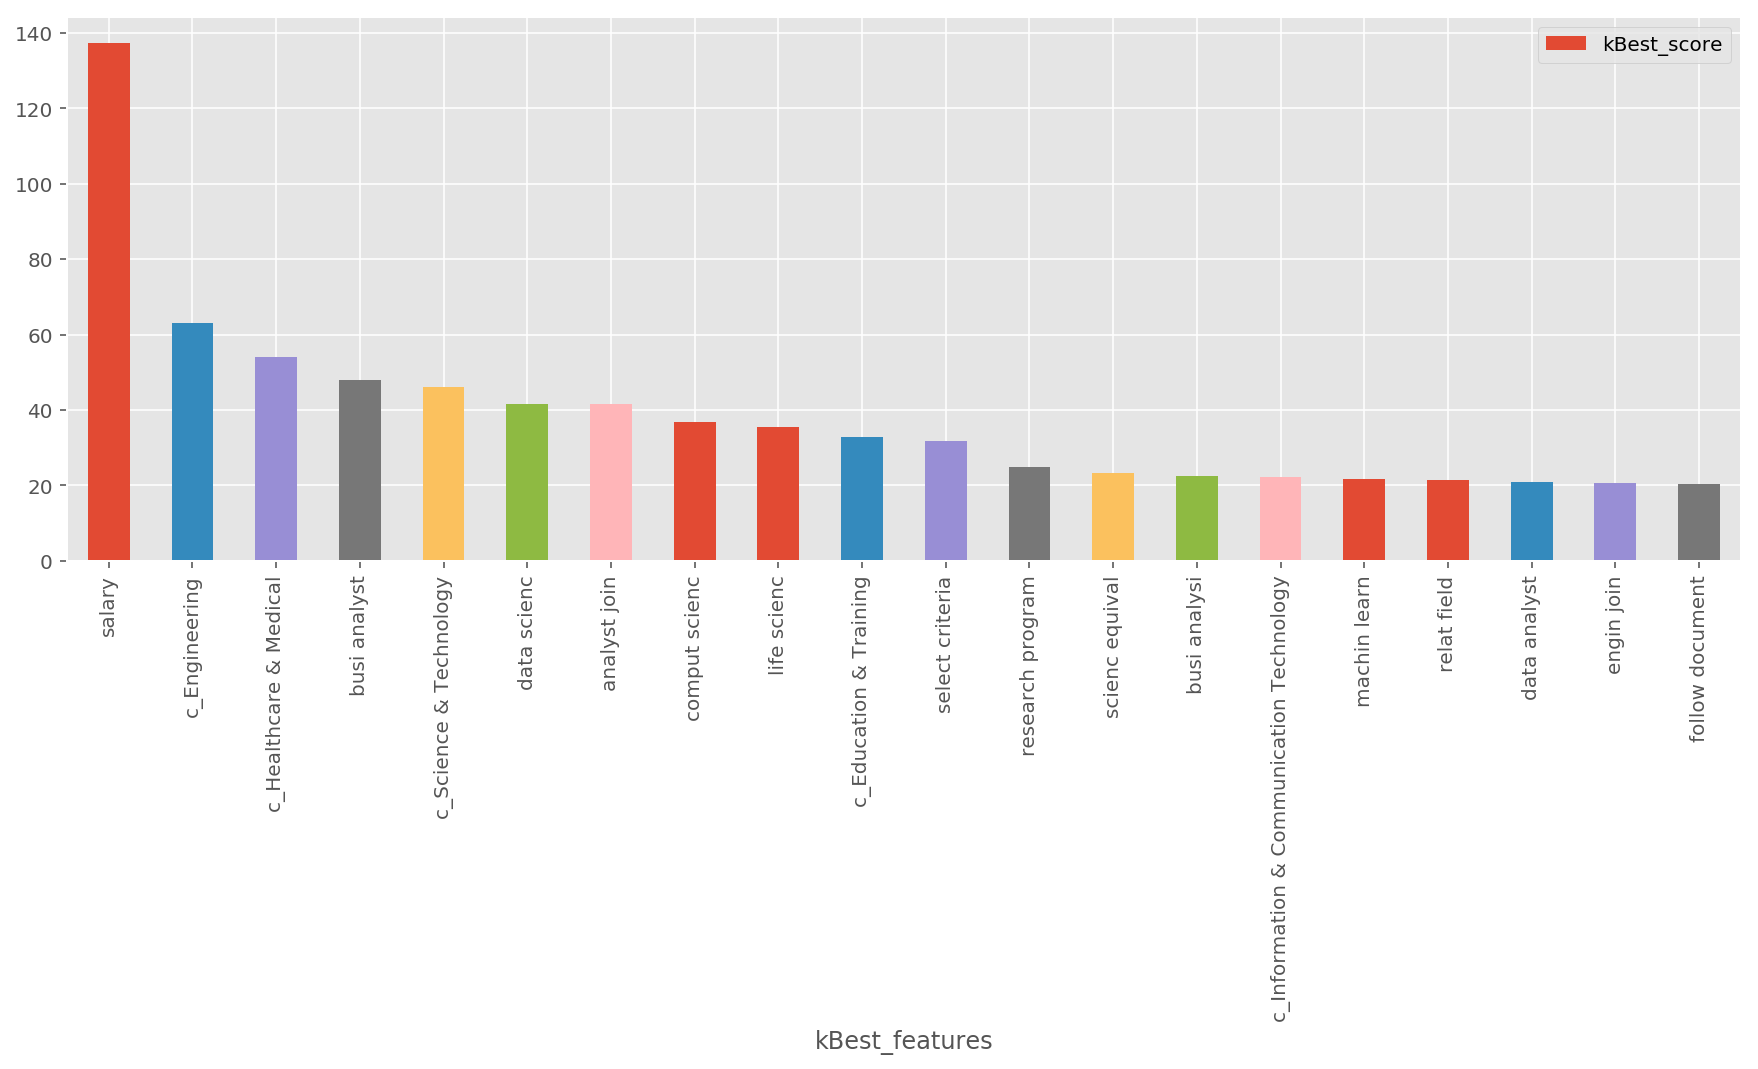

In [23]:
cvec = CountVectorizer(ngram_range=(2,3), stop_words=custom_stop_words, max_features=1000)
X_train_data1, X_test_data1 = tokenize_test(cvec)

Features:  200


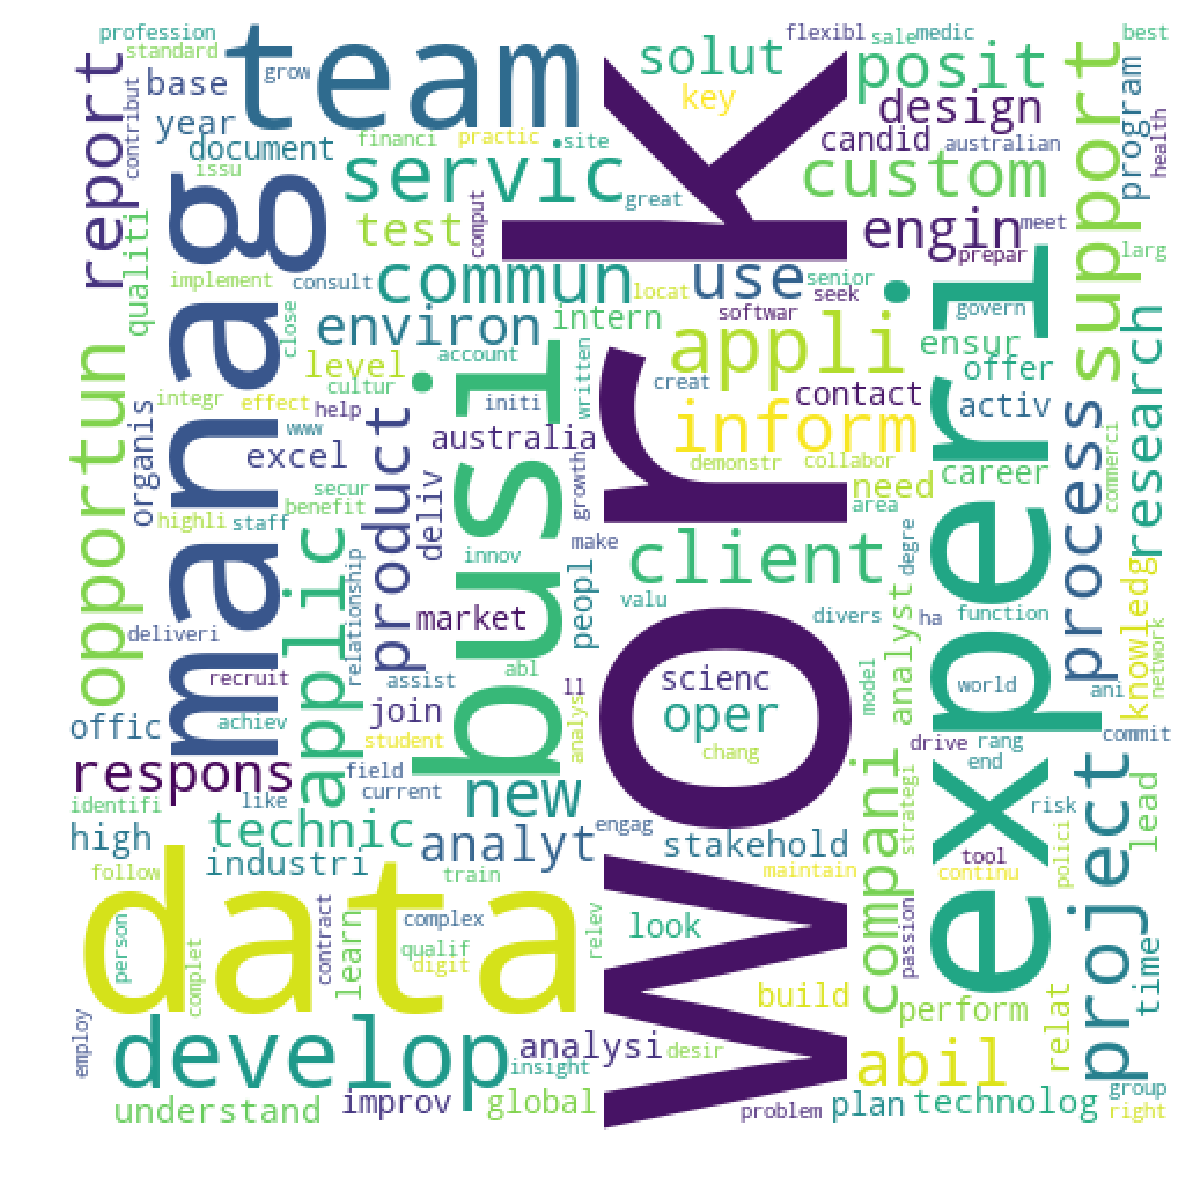

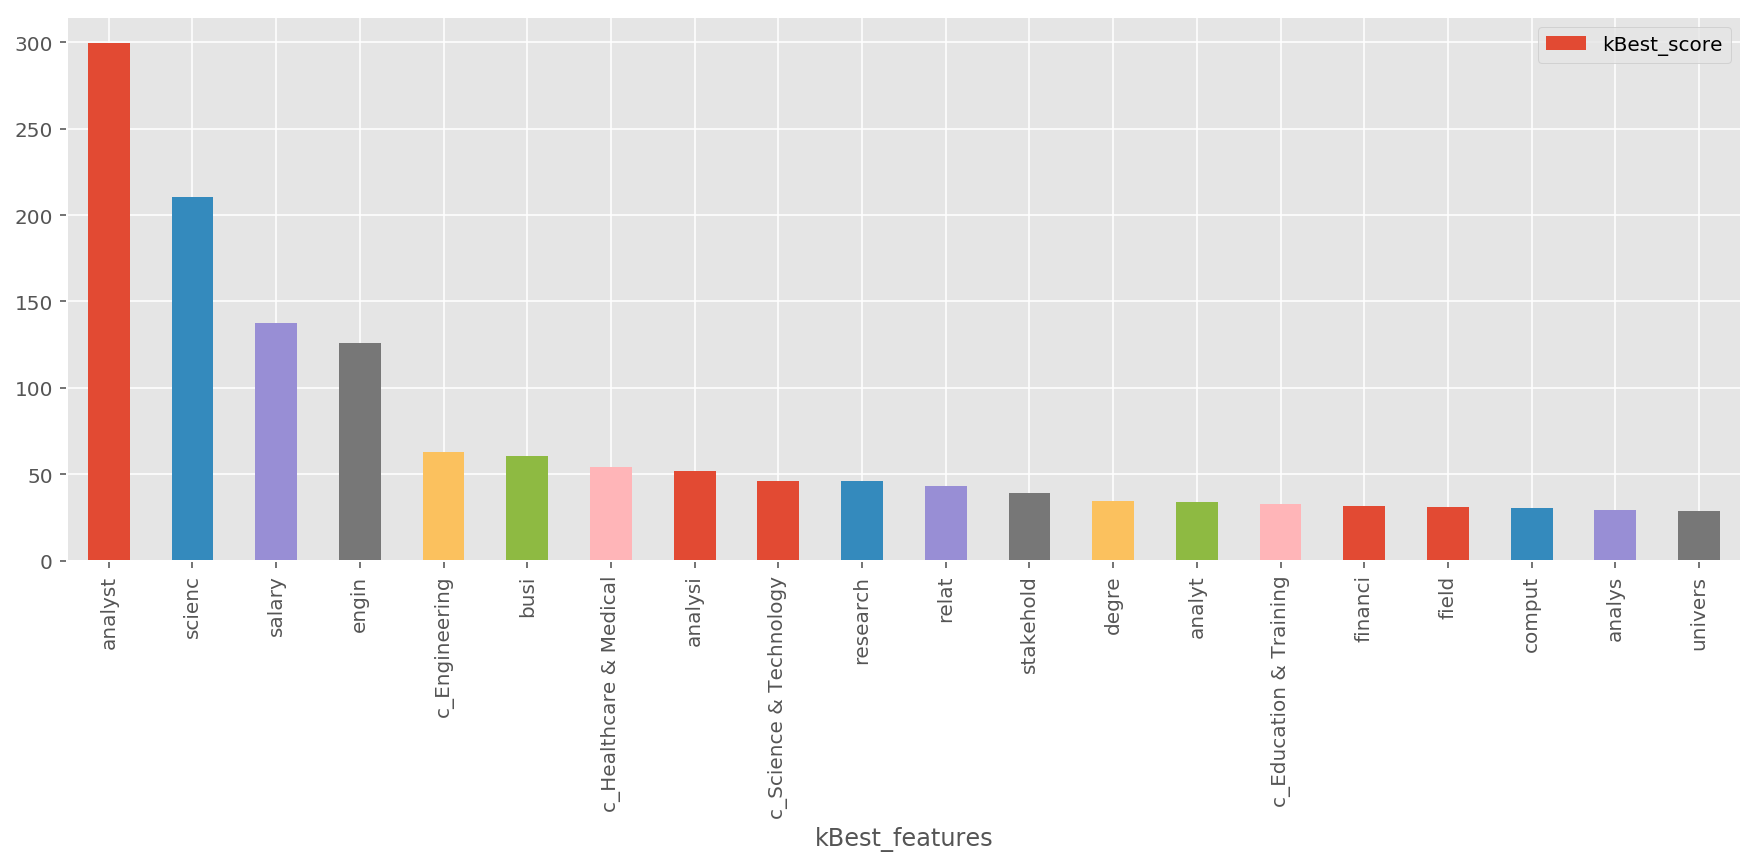

In [24]:
# Setting the vectorizer with different parameters to see the differences
cvec = CountVectorizer(ngram_range=(1,3),stop_words=custom_stop_words, max_features=200)

# reuse the variables -> too many feature previously
X_train_data2, X_test_data2 = tokenize_test(cvec)

Most features selected are pretty similar from both cvec and tvec

### Why Use TFIDF?
- Common words are penalized
- Rare words have more influence

Sklearn provides a tf-idf vectorizer that works similarly to the other vectorizers. 
Eliminate stop words to improve our analysis.


Features:  200


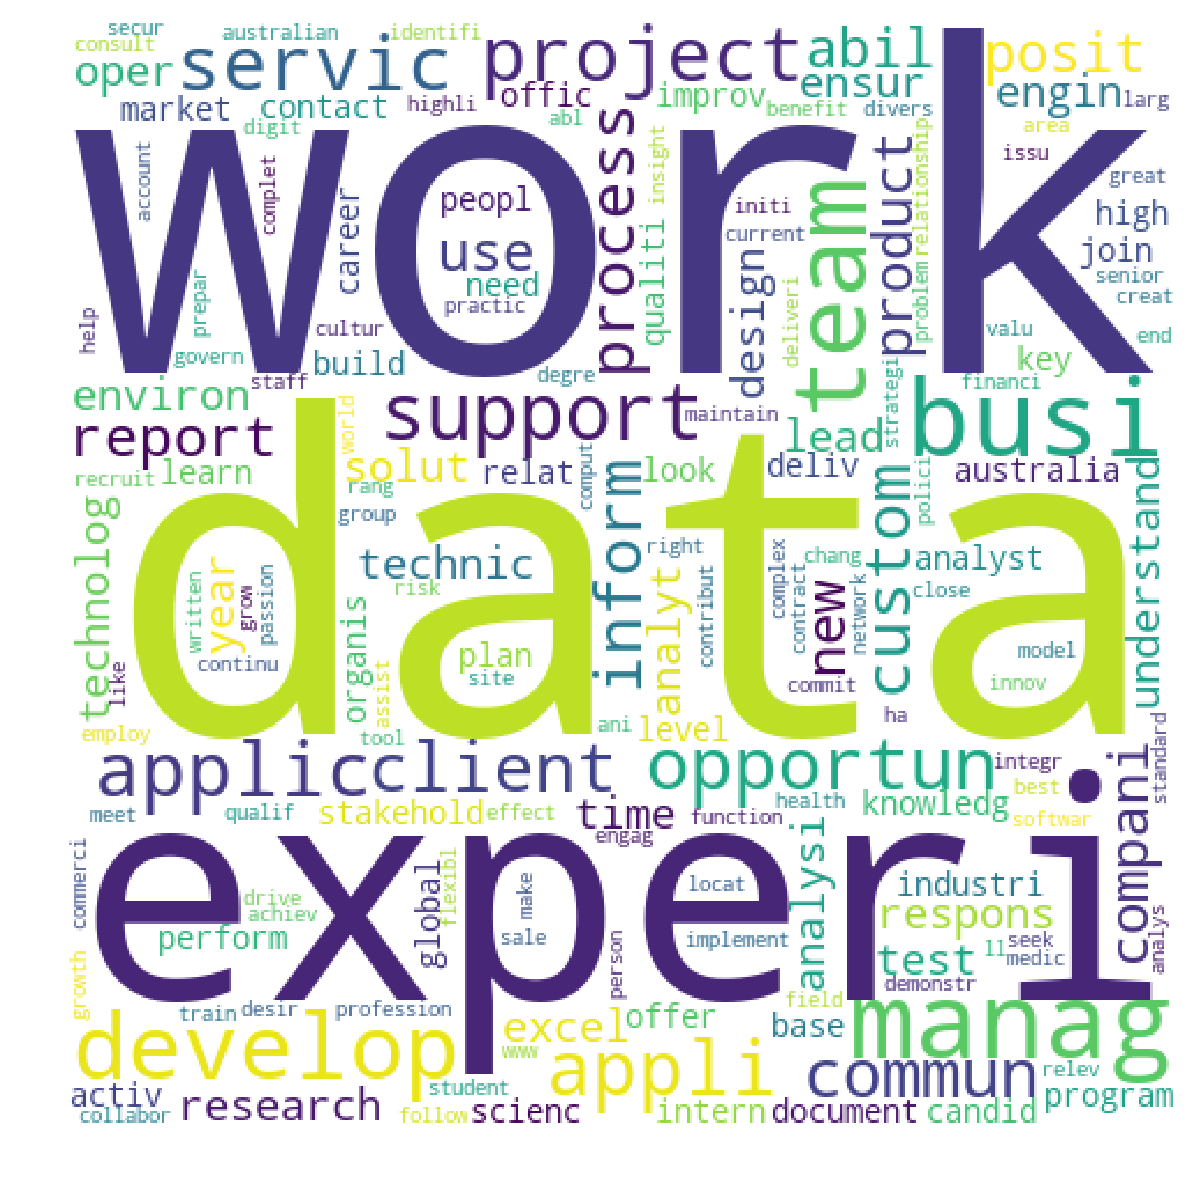

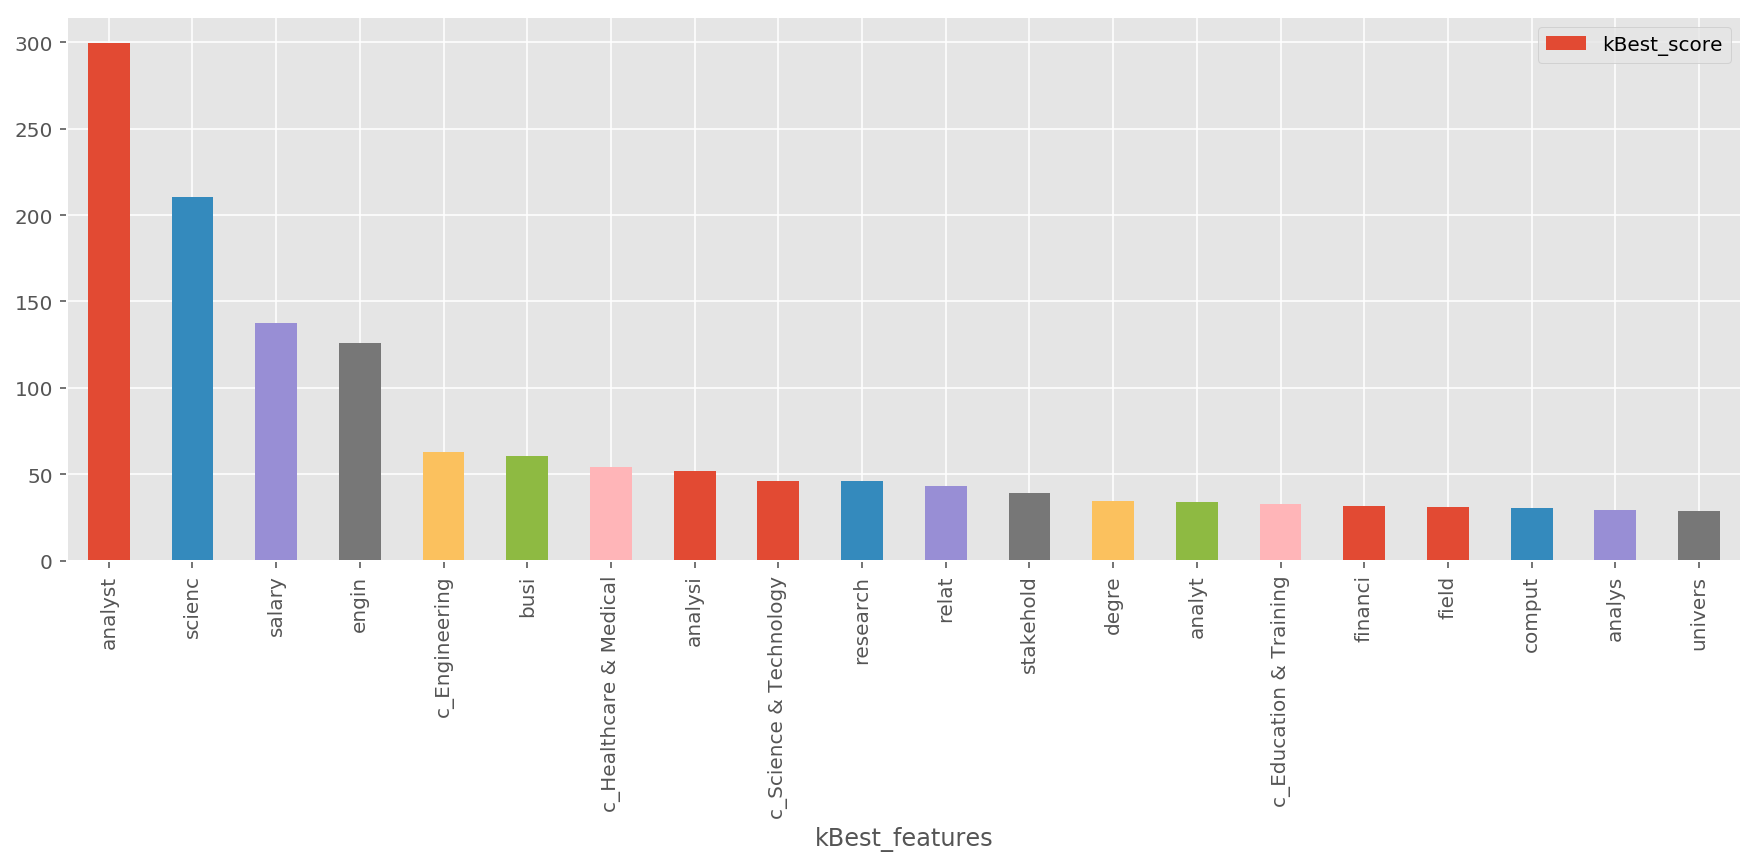

In [25]:
# Use the TfidfVectorizer
tvec = TfidfVectorizer(ngram_range=(2,3), stop_words=custom_stop_words, max_features=1000)

# too many features previously - reuse the variables

# reuse the variables -> too many feature previously
X_train_data3, X_test_data3 = tokenize_test(cvec)


Features:  200


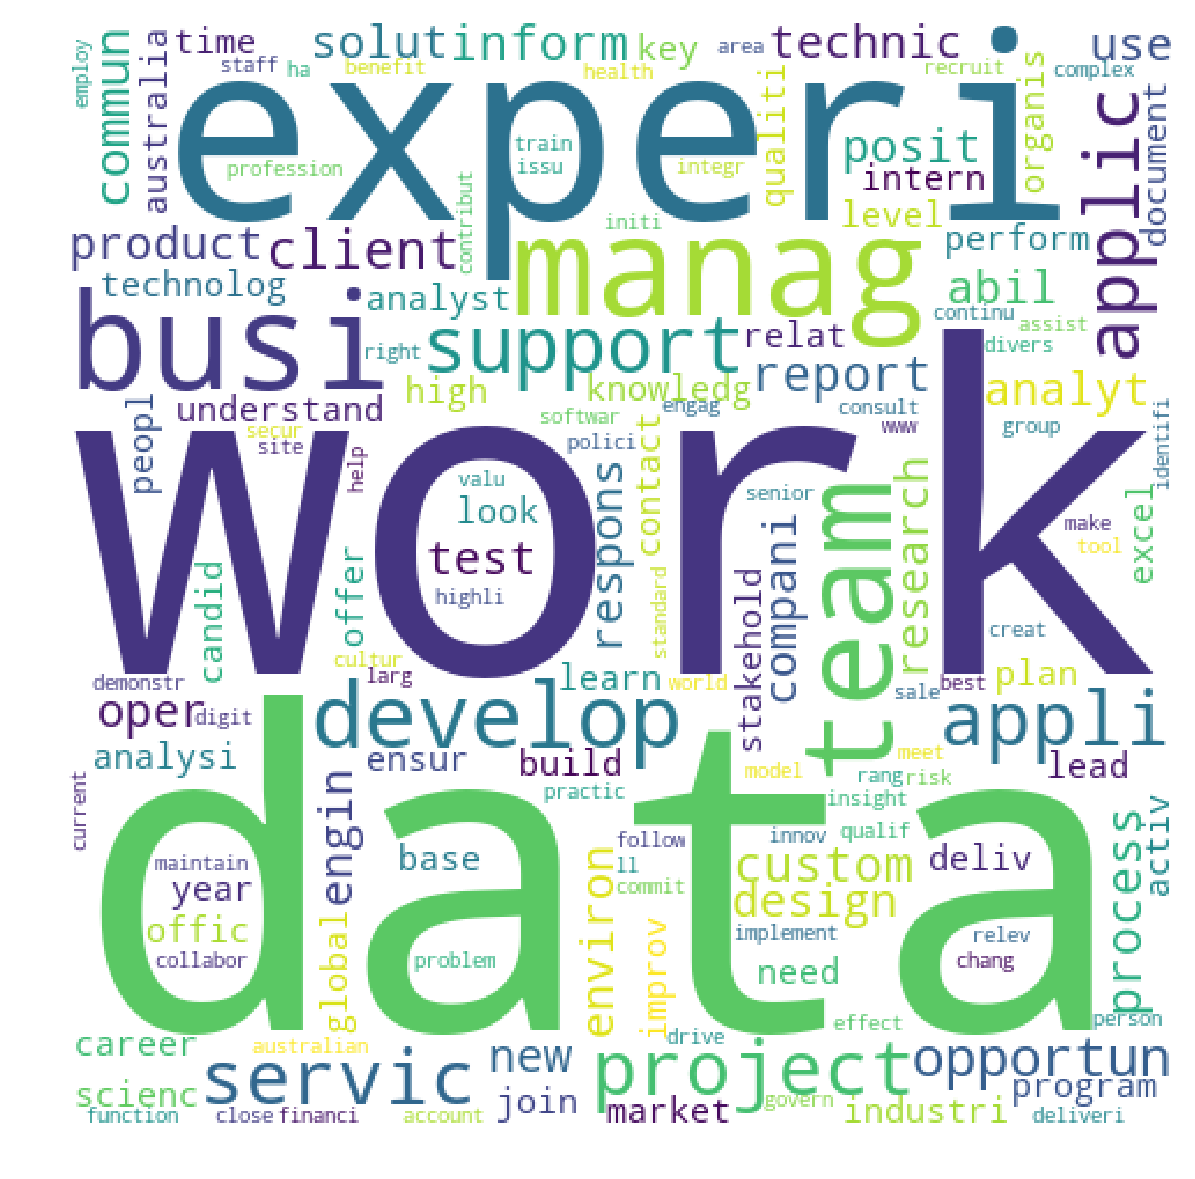

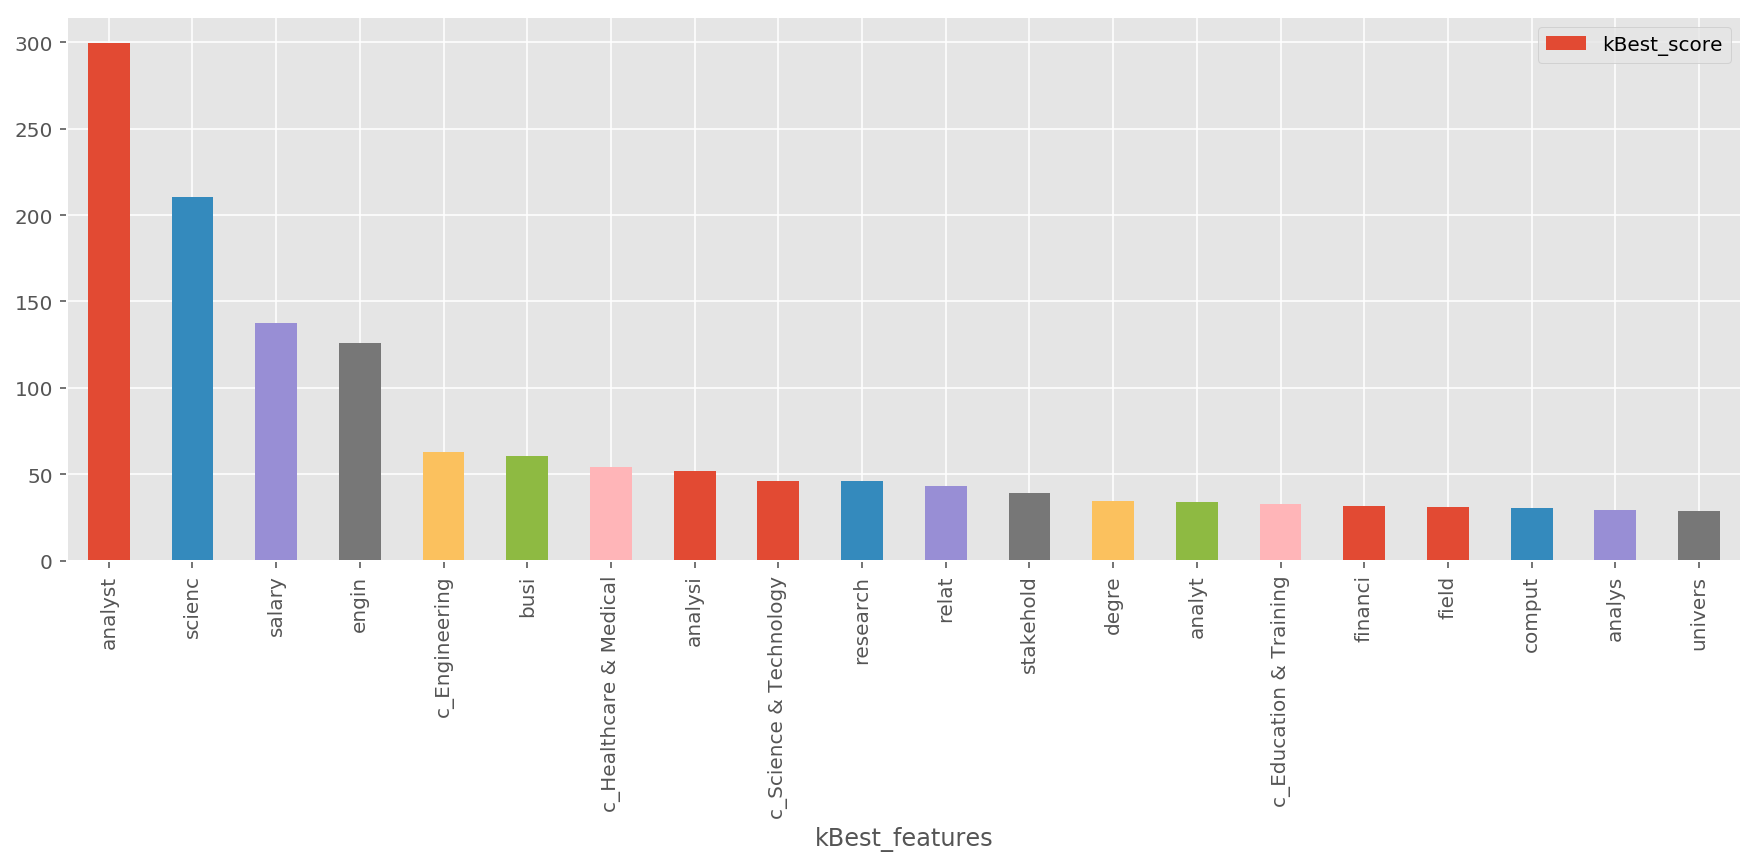

In [26]:
# Use the TfidfVectorizer
tvec = TfidfVectorizer(ngram_range=(1,3),stop_words=custom_stop_words, max_features=200)

# reuse the variables -> too many feature previously
X_train_data4, X_test_data4 = tokenize_test(cvec)


In [27]:
def apply_models(X_train_data, X_test_data):
    scores_list = []
    for model in models:
        scores_list.append(apply_model(model, models[model], X_train_data, X_test_data))

    scores_Df = pd.DataFrame(scores_list, index=models.values(), columns=colNames)
    return scores_Df

In [28]:
df = apply_models(X_train_data1, X_test_data1)
print('CVEC with word_max_features=1000 with ngrams of 2 - 3 words')
df

                precision    recall  f1-score   support

  Data Analyst       0.84      0.71      0.77       193
 Data Engineer       0.60      0.76      0.67       123
Data Scientist       0.66      0.63      0.64       103

   avg / total       0.72      0.71      0.71       419

                precision    recall  f1-score   support

  Data Analyst       0.87      0.67      0.76       193
 Data Engineer       0.55      0.77      0.64       123
Data Scientist       0.66      0.61      0.63       103

   avg / total       0.72      0.69      0.69       419

                precision    recall  f1-score   support

  Data Analyst       0.87      0.78      0.82       193
 Data Engineer       0.74      0.84      0.79       123
Data Scientist       0.70      0.72      0.71       103

   avg / total       0.79      0.78      0.78       419

                precision    recall  f1-score   support

  Data Analyst       0.84      0.83      0.83       193
 Data Engineer       0.74      0.76   

,Train,Test,Accuracy Crossval,Accuracy Score
Multinomail Naive Bayes,0.813525,0.706444,0.717227,0.706444
BernoulliNB Naive Bayes,0.778689,0.687351,0.690560,0.687351
Logistic Regression L1,0.989754,0.782816,0.782815,0.782816
Logistic Regression L2,0.998975,0.773270,0.780764,0.773270
Random Forest,1.000000,0.789976,0.796107,0.789976


In [29]:
df = apply_models(X_train_data2, X_test_data2)
print('CVEC with word_max_features=200 with ngrams of 1 - 3 words')
df

                precision    recall  f1-score   support

  Data Analyst       0.87      0.87      0.87       193
 Data Engineer       0.72      0.78      0.75       123
Data Scientist       0.66      0.60      0.63       103

   avg / total       0.78      0.78      0.77       419

                precision    recall  f1-score   support

  Data Analyst       0.93      0.87      0.90       193
 Data Engineer       0.82      0.79      0.80       123
Data Scientist       0.71      0.83      0.76       103

   avg / total       0.84      0.84      0.84       419

                precision    recall  f1-score   support

  Data Analyst       0.92      0.88      0.90       193
 Data Engineer       0.80      0.84      0.82       123
Data Scientist       0.73      0.76      0.74       103

   avg / total       0.84      0.84      0.84       419

                precision    recall  f1-score   support

  Data Analyst       0.91      0.87      0.89       193
 Data Engineer       0.78      0.82   

,Train,Test,Accuracy Crossval,Accuracy Score
Multinomail Naive Bayes,0.796107,0.775656,0.771554,0.775656
BernoulliNB Naive Bayes,0.859631,0.835322,0.831947,0.835322
Logistic Regression L1,0.990779,0.835322,0.861669,0.835322
Logistic Regression L2,0.994877,0.823389,0.807394,0.823389
Random Forest,1.000000,0.906921,0.925212,0.906921


In [30]:
df = apply_models(X_train_data3, X_test_data3)
print('TVEC with word_max_features=1000 with ngrams of 2 - 3 words')
df

                precision    recall  f1-score   support

  Data Analyst       0.87      0.87      0.87       193
 Data Engineer       0.72      0.78      0.75       123
Data Scientist       0.66      0.60      0.63       103

   avg / total       0.78      0.78      0.77       419

                precision    recall  f1-score   support

  Data Analyst       0.93      0.87      0.90       193
 Data Engineer       0.82      0.79      0.80       123
Data Scientist       0.71      0.83      0.76       103

   avg / total       0.84      0.84      0.84       419

                precision    recall  f1-score   support

  Data Analyst       0.92      0.88      0.90       193
 Data Engineer       0.80      0.84      0.82       123
Data Scientist       0.73      0.76      0.74       103

   avg / total       0.84      0.84      0.84       419

                precision    recall  f1-score   support

  Data Analyst       0.91      0.87      0.89       193
 Data Engineer       0.78      0.82   

,Train,Test,Accuracy Crossval,Accuracy Score
Multinomail Naive Bayes,0.796107,0.775656,0.771554,0.775656
BernoulliNB Naive Bayes,0.859631,0.835322,0.831947,0.835322
Logistic Regression L1,0.990779,0.835322,0.861669,0.835322
Logistic Regression L2,0.994877,0.823389,0.807394,0.823389
Random Forest,1.000000,0.902148,0.924186,0.902148


In [31]:
df = apply_models(X_train_data4, X_test_data4)
print('TVEC with word_max_features=200 with ngrams of 1 - 3 words')
df

                precision    recall  f1-score   support

  Data Analyst       0.87      0.87      0.87       193
 Data Engineer       0.72      0.78      0.75       123
Data Scientist       0.66      0.60      0.63       103

   avg / total       0.78      0.78      0.77       419

                precision    recall  f1-score   support

  Data Analyst       0.93      0.87      0.90       193
 Data Engineer       0.82      0.79      0.80       123
Data Scientist       0.71      0.83      0.76       103

   avg / total       0.84      0.84      0.84       419

                precision    recall  f1-score   support

  Data Analyst       0.92      0.88      0.90       193
 Data Engineer       0.80      0.84      0.82       123
Data Scientist       0.73      0.76      0.74       103

   avg / total       0.84      0.84      0.84       419

                precision    recall  f1-score   support

  Data Analyst       0.91      0.87      0.89       193
 Data Engineer       0.78      0.82   

,Train,Test,Accuracy Crossval,Accuracy Score
Multinomail Naive Bayes,0.796107,0.775656,0.771554,0.775656
BernoulliNB Naive Bayes,0.859631,0.835322,0.831947,0.835322
Logistic Regression L1,0.990779,0.835322,0.861669,0.835322
Logistic Regression L2,0.994877,0.823389,0.807394,0.823389
Random Forest,1.000000,0.904535,0.922130,0.904535


In [32]:
dummy.head(2)

,salary,title_cat,position_lvl,c_Administration & Office Support,"c_Advertising, Arts & Media",c_Banking & Financial Services,c_CEO & General Management,c_Call Centre & Customer Service,c_Community Services & Development,c_Construction,...,c_Sport & Recreation,c_Trades & Services,s_NSW,s_NT,s_QLD,s_SA,s_TAS,s_VIC,s_WA,stem
0,0,Data Analyst,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,the global transit depart is respons for the p...
1,0,Data Analyst,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,I m look to speak to mid to senior level data ...


In [33]:
value_counts = dummy['title_cat'].value_counts()

In [34]:
baseline = value_counts.values[0] / value_counts.sum()
baseline

0.46093189964157705

The best model is 
CVEC with word_max_features=200 with ngrams of 1 - 3 words
Random Forest
with 90.6% accurancy score to predict if the job title is classified as data scientist/data analyst/data engineering

Top Features that determines the job title are:
    
    *  Analyst
    *  Science
    *  Salary
    *  Engin
    *  Engineering Classification
    *  Busi
    *  Healthcare * Medical Classification
    *  Analysi
    *  Science and Technology Classification
    *  Research